# PreMODIT: The robust range of temperature as a function of dE  

## What is the elower grid trange file?

The elower grid trange file contains the robust temeprature range, (Tl - Th) K as a function of $\Delta E$, $T_\mathrm{ref}$, and $T_\mathrm{wt}$. 
ExoJAX has own the default elower grid trange (degt) files.  Currently (Jan 2024), The current default version is 2.  
Let's use version=2, which expands the temperature range. 

In [4]:
#if needed
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

default elower grid trange (degt) file version: 2
(2, 75, 75, 39, 3)
(2, 75, 75, 39, 3)
Twt=151.42184657305015K, Tref=86.94822365864665K


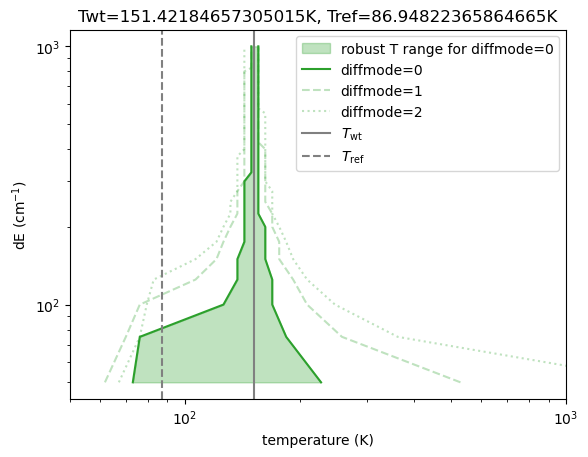

In [5]:
from exojax.spec.lbderror import default_elower_grid_trange_file
import numpy as np

filename = default_elower_grid_trange_file(version=2)
dat = np.load(filename)
arr = dat["arr_0"]
Tarr = dat["arr_1"] # np.logspace(np.log10(100),np.log10(5000),120)
Twtarr = dat["arr_2"] #np.logspace(np.log10(100.1),np.log10(2000.1),50)
Trefarr = dat["arr_3"] #Trefarr - np.logspace(np.log10(100),np.log10(2000),50)
dEarr = dat["arr_4"] #dEarr - np.linspace(100,1500,29)

print(np.shape(arr)) # (tl/th, len(Twtarr), len(Trefarr), len(dEarr), diffmode0,1,2)
print((2, len(Twtarr), len(Trefarr), len(dEarr),3))

i = 20
j = 10
Twt = Twtarr[i]
Tref = Trefarr[j]
subscript = "Twt="+str(Twt)+"K, Tref="+str(Tref)+"K"
print(subscript)


import matplotlib.pyplot as plt
diffmode = 0
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]

plt.fill_betweenx(dEarr, tlow, thigh, color="C2", alpha=0.3, label="robust T range for diffmode=0")
plt.plot(tlow, dEarr, color="C2", label="diffmode=0")
plt.plot(thigh, dEarr, color="C2")

diffmode = 1
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]
plt.plot(tlow, dEarr, color="C2", alpha=0.3, ls="dashed", label="diffmode=1")
plt.plot(thigh, dEarr, color="C2", alpha=0.3, ls="dashed")


diffmode = 2
tlow = arr[0,i,j,:,diffmode]
thigh = arr[1,i,j,:,diffmode]
plt.plot(tlow, dEarr, color="C2", alpha=0.3, ls="dotted", label="diffmode=2")
plt.plot(thigh, dEarr, color="C2", alpha=0.3, ls="dotted")


plt.axvline()
plt.axvline(Twt,label="$T_\mathrm{wt}$",color="gray")
plt.axvline(Tref,label="$T_\mathrm{ref}$",ls="dashed",color="gray")
plt.xscale("log")
plt.yscale("log")
plt.xlim(50,1000)
plt.xlabel("temperature (K)")
plt.ylabel("dE ($\\mathrm{cm}^{-1}$)")
plt.legend()
plt.title(subscript)
plt.show()

## How to specify the version of the degt file.

`OpaPremodit` has an argument to choose the version of the degt file. The version=2 has a wider range of the temperature range than version 1. 

In [6]:
from exojax.spec.api import MdbHitemp
from exojax.spec.opacalc import OpaPremodit
from exojax.utils.grids import wavenumber_grid
nus_start = 10000.0
nus_end = 11000.0
N=1000
nus, wav, res = wavenumber_grid(nus_start,nus_end,N,unit="cm-1",xsmode="premodit")
mdb = MdbHitemp("CH4",nurange=[nus_start,nus_end], isotope=1)
opa = OpaPremodit(mdb, nu_grid=nus, allow_32bit=True, auto_trange=[80.0, 300.0],diffmode=0, version_auto_trange=2)

xsmode =  premodit
xsmode assumes ESLOG in wavenumber space: mode=premodit
We changed the policy of the order of wavenumber/wavelength grids
wavenumber grid should be in ascending order and now 
users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order
This might causes the bug if you update ExoJAX. 
Note that the older ExoJAX assumes ascending order as wavelength grid.


/home/exoplanet01/exojax/src/exojax/utils/grids.py:145: UserWarning: Resolution may be too small. R=10481.566628569737
  warnings.warn('Resolution may be too small. R=' + str(resolution),
/home/exoplanet01/exojax/src/exojax/utils/jaxstatus.py:19: UserWarning: JAX is 32bit mode. We recommend to use 64bit mode. 
You can change to 64bit mode by writing 

    from jax import config 
    config.update("jax_enable_x64", True)

  warnings.warn(msg+how_change_msg)


OpaPremodit: params automatically set.
default elower grid trange (degt) file version: 2
Robust range: 79.45501192821337 - 740.1245313998245 K
Change the reference temperature from 296.0K to 91.89455622053987 K.


/home/exoplanet01/exojax/src/exojax/spec/api.py:631: RuntimeWarning: divide by zero encountered in log
  self.logsij0 = np.log(self.line_strength_ref)


OpaPremodit: Tref_broadening is set to  154.91933384829665 K
OpaPremodit: gamma_air and n_air are used. gamma_ref = gamma_air/Patm
# of reference width grid :  6
# of temperature exponent grid : 2


uniqidx: 100%|██████████| 4/4 [00:00<00:00, 33.59it/s]


Premodit: Twt= 328.42341041740974 K Tref= 91.89455622053987 K
Making LSD:|####################| 100%


## How to generate your elower grid trange file

The degt file is actually generated by `src/exojax/spec/generate_elower_grid_trange.py`. Extracting the essence of the code, we just set the parameters 

```
N_Twt (int): the number of Twt grid
N_Tref (int): the number of Tref grid
N_Trange (int): the number of Trange to serach for Tlow and Thigh
N_dE (int): the number of dE grid
Treflow (float): lower limit of Tref grid
Trefhigh (float): upper limit of Tref grid
Twtlow (float): lower limit of Twt grid
Twthigh (float): upper limit of Twt grid
Tsearchl (float): lower limit of Trange grid
Tsearchh (float): upper limit of Trange grid
dErangel (float): lower limit of dE grid
dErangeh (float): upper limit of dE grid
filename (str): output filename
```
     
as

In [ ]:
N_Twt = 75                   
N_Tref = N_Twt
N_Trange = 120
N_dE = 39
Trefl = 50.0
Trangelwt = Trefl + 0.1
Trefh = 3000.0
Trangehwt = Trefh + 0.1
Tsearchl = 50.0
Tsearchh = 7500.0
dErangel = 50
dErangeh = 1000
filename = "elower_grid_trange_v2.npz"


The above code just sets the parameters of the degt file. Then, using these parameters, we can generate the degt file as following.
Note that it takes hours to a day.

In [ ]:
from exojax.spec.generate_elower_grid_trange import generate_elower_grid_trange
generate_elower_grid_trange(
    N_Twt,
    N_Tref,
    N_Trange,
    N_dE,
    Trefl,
    Trefh,
    Trangelwt,
    Trangehwt,
    Tsearchl,
    Tsearchh,
    dErangel,
    dErangeh,
    filename,
)
